In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Dataset Exploration

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
print(train_labels[0:20])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]


In [5]:
print(tf.reduce_min(train_images[0]), tf.reduce_max(train_images[0]))

tf.Tensor(0, shape=(), dtype=uint8) tf.Tensor(255, shape=(), dtype=uint8)


In [6]:
print(test_images.shape, test_labels.shape)

(10000, 32, 32, 3) (10000, 1)


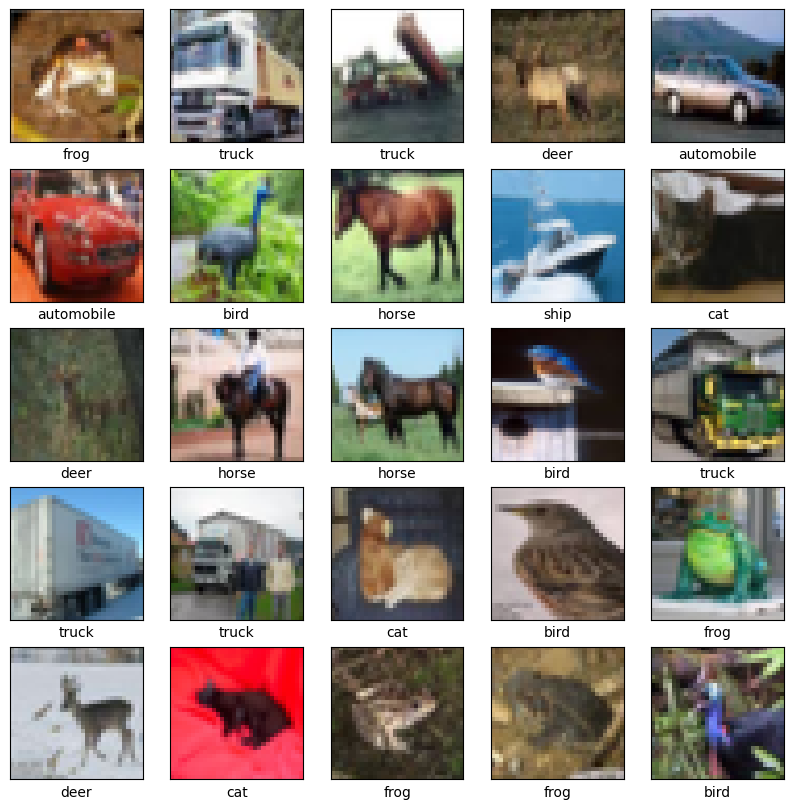

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Pre-processing

In [8]:
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0
print(tf.reduce_min(train_images[0]), tf.reduce_max(train_images[0]))

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [9]:
print('Before: ', train_labels[0])
train_labels = tf.one_hot(train_labels[..., 0], depth=10)
print('After: ', train_labels[0])

Before:  [6]
After:  tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


In [16]:
train_labels[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [13]:
test_labels = tf.one_hot(test_labels[..., 0], depth=10)

In [17]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


## Model Building

In [18]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape = [32, 32, 3],
    alpha = 1.0,
    weights = None,
    classes = 10,
    classifier_activation = 'softmax'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

## Model Training

In [11]:
epochs = 20

In [26]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=1024, verbose=True, validation_data=(test_images, test_labels))

Epoch 1/20
49/49 [==============================] - 25s 431ms/step - loss: 0.7356 - accuracy: 0.7436 - val_loss: 1.2287 - val_accuracy: 0.6369
Epoch 2/20
49/49 [==============================] - 16s 321ms/step - loss: 0.6149 - accuracy: 0.7824 - val_loss: 1.1775 - val_accuracy: 0.6447
Epoch 3/20
49/49 [==============================] - 16s 322ms/step - loss: 0.5794 - accuracy: 0.7961 - val_loss: 1.1033 - val_accuracy: 0.6542
Epoch 4/20
49/49 [==============================] - 16s 324ms/step - loss: 0.5563 - accuracy: 0.8031 - val_loss: 1.0212 - val_accuracy: 0.6682
Epoch 5/20
49/49 [==============================] - 16s 325ms/step - loss: 0.5360 - accuracy: 0.8106 - val_loss: 1.0215 - val_accuracy: 0.6626
Epoch 6/20
37/49 [=====================>........] - ETA: 3s - loss: 0.5151 - accuracy: 0.8180

KeyboardInterrupt: ignored

## Evaluation

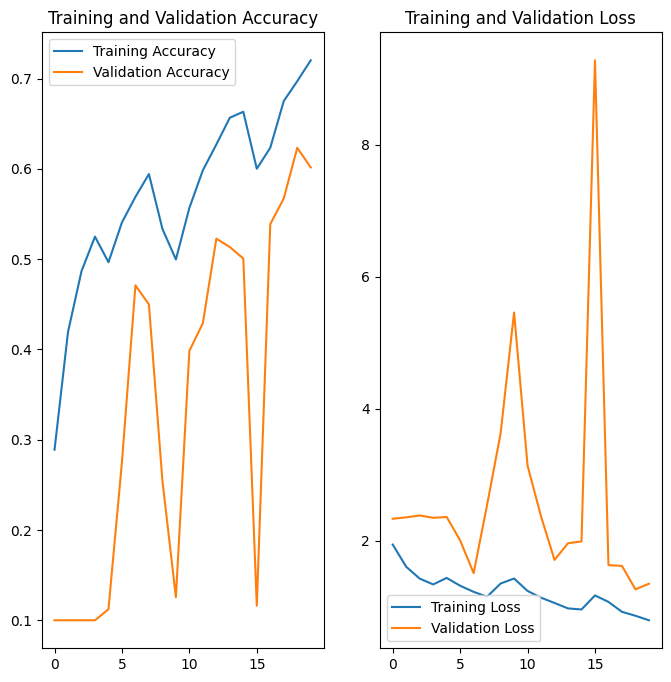

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  print(predicted_label, true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [22]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 5ms/step


In [23]:
predictions[0]

array([5.7732000e-04, 2.0789831e-04, 1.3687075e-03, 8.6756551e-01,
       1.1843600e-03, 1.0456667e-01, 2.4325732e-02, 5.9069233e-05,
       1.3336184e-04, 1.1407885e-05], dtype=float32)

3 3


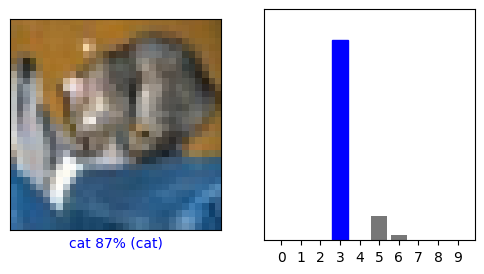

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

3 3
1 8
1 8
0 0
6 6
6 6
3 1
6 6
3 3
1 1
0 0
9 9
6 5
7 7
9 9


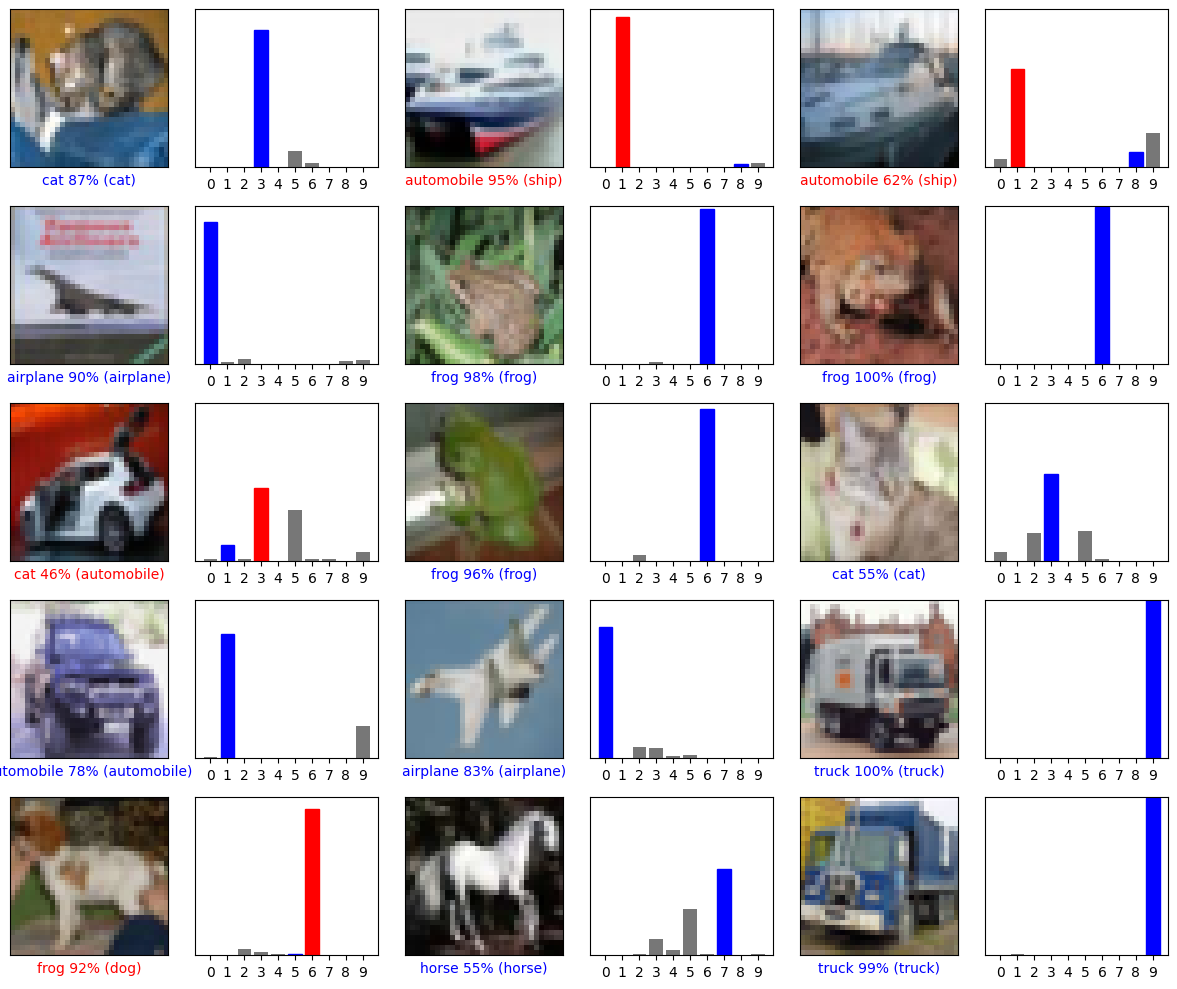

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(4*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

